### Exploring covid and deprivation 

This notebook contains code to start importing key datasets on covid, population statistics and indices of multiple deprivation, join them and do some basic summary statistics and visualisations to explore the patterns.

## Packages and setup

In [25]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

## Import data and Data Exploration

### 1) COVID

We begin by importing the covid datasets

In [26]:
data_covid_cases = pd.read_csv("data/covidCases - utla_2021-06-30.csv")

In [27]:
data_covid_deaths = pd.read_csv("data/covidDeaths - utla_2021-06-30 (1).csv")

In [28]:
data_covid_cases.head()

,areaCode,areaName,areaType,date,newCasesByPublishDate
0,E06000003,Redcar and Cleveland,utla,2021-06-30,93
1,E06000014,York,utla,2021-06-30,146
2,E06000050,Cheshire West and Chester,utla,2021-06-30,148
3,E08000001,Bolton,utla,2021-06-30,127
4,E08000016,Barnsley,utla,2021-06-30,157


In [29]:
data_covid_deaths.head()

,areaCode,areaName,areaType,date,newOnsDeathsByRegistrationDate
0,E06000003,Redcar and Cleveland,utla,2021-06-18,0
1,E06000014,York,utla,2021-06-18,0
2,E06000050,Cheshire West and Chester,utla,2021-06-18,0
3,E08000001,Bolton,utla,2021-06-18,3
4,E08000016,Barnsley,utla,2021-06-18,0


Let's check how many unique area codes there are in this dataset.

In [30]:
data_covid_cases.areaCode.value_counts() # 214 codes

E06000003    440
E09000030    440
E08000024    440
E08000025    440
E08000026    440
            ... 
N09000009    315
N09000002    315
N09000005    315
N09000006    308
S12000013    300
Name: areaCode, Length: 214, dtype: int64

In [31]:
data_covid_deaths.areaCode.value_counts() # 171 codes

E08000027    67
E08000004    67
E06000042    67
E08000031    67
E06000041    67
             ..
E06000031    64
E06000003    64
W06000009    63
E06000017    63
W06000001    63
Name: areaCode, Length: 171, dtype: int64

For both of these, we need to do some processing, before we can use them. It would be good to write a function to do the following:
* Extract the year from the date column.
* Group the data by year and areaCode and areaName, sum the cases and deaths 

Note that the primary key in this case is the areaCode.

### 2) Population and Data Cleaning

We require the population data to calculate per population rates for covid and other statistics. Taking a quick preview of the csv file, we need to skip the first 3 rows.

In [32]:
data_population = pd.read_csv("data/Population - Sheet1.csv", skiprows = 3)

In [33]:
data_population.head()

,Code,Name,Geography,Area (sq km),Estimated population mid-2020,2020 people per sq. km,Estimated Population mid-2019,2019 people per sq. km,Estimated Population mid-2018,2018 people per sq. km,...,Estimated Population mid-2005,2005 people per sq. km,Estimated Population mid-2004,2004 people per sq. km,Estimated Population mid-2003,2003 people per sq. km,Estimated Population mid-2002,2002 people per sq. km,Estimated Population mid-2001,2001 people per sq. km
0,K02000001,UNITED KINGDOM,Country,"242,741","67,081,234",276,"66,796,807",275,"66,435,550",274,...,"60,413,276",249,"59,950,364",247,"59,636,662",246,"59,365,677",245,"59,113,016",244
1,K03000001,GREAT BRITAIN,Country,"228,948","65,185,724",285,"64,903,140",283,"64,553,909",282,...,"58,685,543",256,"58,236,322",254,"57,931,738",253,"57,668,143",252,"57,424,178",251
2,K04000001,ENGLAND AND WALES,Country,"151,047","59,719,724",395,"59,439,840",394,"59,115,809",391,...,"53,575,343",355,"53,152,022",352,"52,863,238",350,"52,602,143",348,"52,359,978",347
3,E92000001,ENGLAND,Country,"130,310","56,550,138",434,"56,286,961",432,"55,977,178",430,...,"50,606,034",388,"50,194,600",385,"49,925,517",383,"49,679,267",381,"49,449,746",379
4,E12000001,NORTH EAST,Region,"8,581","2,680,763",312,"2,669,941",311,"2,657,909",310,...,"2,547,127",297,"2,540,502",296,"2,540,461",296,"2,540,600",296,"2,540,090",296


From the above, the key fields we need are Code (the primary key), Name, Geography (just for info), Estimated population mid-2020 and maybe 2020 people per sq. km.

In [34]:
data_population.Code.value_counts() # 420 codes, but this is due to multiple geographies

K02000001    1
E07000062    1
E07000111    1
E07000110    1
E07000109    1
            ..
E07000195    1
E07000194    1
E07000193    1
E07000192    1
N09000010    1
Name: Code, Length: 420, dtype: int64

In [35]:
data_population.Geography.value_counts()

Non-metropolitan District    181
Unitary Authority             81
Metropolitan District         36
London Borough                33
Council Area                  32
County                        24
Local Government District     11
Region                         9
Country                        7
Metropolitan County            6
Name: Geography, dtype: int64

Let's move on to the next dataset.

### 3) Indices of Multiple Deprivation

First of all, we can't use the dataset provided as that gives the IMD at the Lower Super Output Level but we need the local authority level. We can download this at File 10 here: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/833995/File_10_-_IoD2019_Local_Authority_District_Summaries__lower-tier__.xlsx. This is saved in the dataset folder.

In [36]:
data_imd = pd.read_excel("data/File_10_-_IoD2019_Local_Authority_District_Summaries__lower-tier__.xlsx", sheet_name="IMD")

In [37]:
data_imd.head()

,Local Authority District code (2019),Local Authority District name (2019),IMD - Average rank,IMD - Rank of average rank,IMD - Average score,IMD - Rank of average score,IMD - Proportion of LSOAs in most deprived 10% nationally,IMD - Rank of proportion of LSOAs in most deprived 10% nationally,IMD 2019 - Extent,IMD 2019 - Rank of extent,IMD 2019 - Local concentration,IMD 2019 - Rank of local concentration
0,E06000001,Hartlepool,22581.98,25,35.037,10,0.3621,10,0.4973,14,32560.44,10
1,E06000002,Middlesbrough,23729.10,16,40.460,5,0.4884,1,0.5710,6,32726.13,3
2,E06000003,Redcar and Cleveland,20348.40,62,29.792,40,0.2386,29,0.3630,43,32545.62,11
3,E06000004,Stockton-on-Tees,17541.72,113,25.790,73,0.2083,39,0.3024,59,32301.09,24
4,E06000005,Darlington,18284.63,103,25.657,77,0.1846,47,0.2891,66,32173.97,32


Now that we've imported all the datasets, we plan a course of action to group datasets where necessary and carry out some joins.

## Linking datasets and Data Merging

This is the plan to group the datasets:

1) Link the IMD and the population datasets with the area code.

2) Group the covid cases and deaths for just 2020 and area code

3) Link the dataset from (1) with the grouped covid cases and death datasets.

Before doing the joins, we make a note of the dimensions of our dataset to check if and how many rows are being dropped after an inner join.

In [39]:
data_imd.shape, data_population.shape

((317, 12), (420, 44))

In [40]:
# 1) Join IMD and pop datasets
data_imd_pop = data_imd.merge(data_population, left_on = 'Local Authority District code (2019)', right_on = 'Code')

In [41]:
data_imd_pop.shape # 306 rows after the inner join, nice!

(306, 56)

This dataset has a lot of columns so we should first select the ones we need for our analysis and also do some renaming to make it easier to refer to columns in code.

In [42]:
data_imd_pop.head()

,Local Authority District code (2019),Local Authority District name (2019),IMD - Average rank,IMD - Rank of average rank,IMD - Average score,IMD - Rank of average score,IMD - Proportion of LSOAs in most deprived 10% nationally,IMD - Rank of proportion of LSOAs in most deprived 10% nationally,IMD 2019 - Extent,IMD 2019 - Rank of extent,...,Estimated Population mid-2005,2005 people per sq. km,Estimated Population mid-2004,2004 people per sq. km,Estimated Population mid-2003,2003 people per sq. km,Estimated Population mid-2002,2002 people per sq. km,Estimated Population mid-2001,2001 people per sq. km
0,E06000001,Hartlepool,22581.98,25,35.037,10,0.3621,10,0.4973,14,...,"90,457",965,"90,317",964,"90,134",962,"89,993",960,"90,152",962
1,E06000002,Middlesbrough,23729.10,16,40.460,5,0.4884,1,0.5710,6,...,"138,517","2,571","138,451","2,570","139,050","2,581","140,090","2,600","141,233","2,621"
2,E06000003,Redcar and Cleveland,20348.40,62,29.792,40,0.2386,29,0.3630,43,...,"138,177",564,"138,643",566,"138,565",565,"138,520",565,"139,159",568
3,E06000004,Stockton-on-Tees,17541.72,113,25.790,73,0.2083,39,0.3024,59,...,"186,350",909,"185,687",906,"185,699",906,"184,940",902,"183,795",897
4,E06000005,Darlington,18284.63,103,25.657,77,0.1846,47,0.2891,66,...,"100,287",508,"99,343",503,"98,911",501,"98,474",499,"97,894",496


# Linking Covid Cases and Deaths

In [43]:
# Turn to date-time and extract year
data_covid_cases["date_formatted"] = pd.to_datetime(data_covid_cases["date"], 
                                                    errors = "coerce",
                                                    infer_datetime_format = True)


In [44]:
# Extract year, drop nulls then convert to int
data_covid_cases["year"] = pd.DatetimeIndex(data_covid_cases["date_formatted"]).year
data_covid_cases = data_covid_cases.dropna(subset = ["year"])
data_covid_cases["year"] = data_covid_cases["year"].astype(int)

In [45]:
grouped_covid_cases = data_covid_cases.groupby(["areaCode", "year"])["newCasesByPublishDate"].sum().reset_index()


In [46]:
grouped_covid_cases


,areaCode,year,newCasesByPublishDate
0,E06000001,2020,5394
1,E06000001,2021,3992
2,E06000002,2020,6770
3,E06000002,2021,6221
4,E06000003,2020,5280
...,...,...,...
423,W06000022,2021,3636
424,W06000023,2020,2111
425,W06000023,2021,1915
426,W06000024,2020,4935


Filtered both Covid cases and deaths datasets so to only include 2020 dates and reformatted the date so they can be merged.

In [47]:
grouped_covid_cases_2020 = grouped_covid_cases[grouped_covid_cases.year == 2020]


In [48]:
grouped_covid_cases_2020


,areaCode,year,newCasesByPublishDate
0,E06000001,2020,5394
2,E06000002,2020,6770
4,E06000003,2020,5280
6,E06000004,2020,9357
8,E06000005,2020,4276
...,...,...,...
418,W06000020,2020,4256
420,W06000021,2020,2629
422,W06000022,2020,7106
424,W06000023,2020,2111


In [49]:
data_covid_deaths

,areaCode,areaName,areaType,date,newOnsDeathsByRegistrationDate
0,E06000003,Redcar and Cleveland,utla,2021-06-18,0
1,E06000014,York,utla,2021-06-18,0
2,E06000050,Cheshire West and Chester,utla,2021-06-18,0
3,E08000001,Bolton,utla,2021-06-18,3
4,E08000016,Barnsley,utla,2021-06-18,0
...,...,...,...,...,...
11137,E06000037,West Berkshire,utla,2020-03-27,2
11138,E08000035,Leeds,utla,2020-03-27,2
11139,E09000017,Hillingdon,utla,2020-03-27,10
11140,E10000012,Essex,utla,2020-03-27,4


In [50]:
# Turn to date-time and extract year
data_covid_deaths["date_formatted"] = pd.to_datetime(data_covid_deaths["date"], 
                                                    errors = "coerce",
                                                    infer_datetime_format = True)


In [51]:
# Extract year, drop nulls then convert to int
data_covid_deaths["year"] = pd.DatetimeIndex(data_covid_deaths["date_formatted"]).year
data_covid_deaths = data_covid_deaths.dropna(subset = ["year"])
data_covid_deaths["year"] = data_covid_deaths["year"].astype(int)

In [52]:
grouped_covid_deaths = data_covid_deaths.groupby(["areaCode", "year"])["newOnsDeathsByRegistrationDate"].sum().reset_index()

In [53]:
grouped_covid_deaths

,areaCode,year,newOnsDeathsByRegistrationDate
0,E06000001,2020,170
1,E06000001,2021,99
2,E06000002,2020,250
3,E06000002,2021,146
4,E06000003,2020,227
...,...,...,...
337,W06000022,2021,138
338,W06000023,2020,144
339,W06000023,2021,125
340,W06000024,2020,133


In [54]:
grouped_covid_deaths_2020 = grouped_covid_deaths[grouped_covid_deaths.year == 2020]


In [55]:
grouped_covid_deaths_2020

,areaCode,year,newOnsDeathsByRegistrationDate
0,E06000001,2020,170
2,E06000002,2020,250
4,E06000003,2020,227
6,E06000004,2020,338
8,E06000005,2020,190
...,...,...,...
332,W06000020,2020,176
334,W06000021,2020,133
336,W06000022,2020,250
338,W06000023,2020,144


In [56]:
# 3) Link the dataset from (1) with the grouped covid cases and death datasets.

In [57]:
data_imd_pop.shape, grouped_covid_deaths_2020.shape, grouped_covid_cases_2020.shape

((306, 56), (171, 3), (214, 3))

In [58]:
#Merged (1) with the Grouped cases dataset
data_imd_pop_deaths = data_imd_pop.merge(grouped_covid_deaths_2020, left_on = 'Local Authority District code (2019)', right_on = 'areaCode')

In [59]:
data_imd_pop_deaths.shape

(123, 59)

In [60]:
data_imd_pop_deaths.head()

,Local Authority District code (2019),Local Authority District name (2019),IMD - Average rank,IMD - Rank of average rank,IMD - Average score,IMD - Rank of average score,IMD - Proportion of LSOAs in most deprived 10% nationally,IMD - Rank of proportion of LSOAs in most deprived 10% nationally,IMD 2019 - Extent,IMD 2019 - Rank of extent,...,2004 people per sq. km,Estimated Population mid-2003,2003 people per sq. km,Estimated Population mid-2002,2002 people per sq. km,Estimated Population mid-2001,2001 people per sq. km,areaCode,year,newOnsDeathsByRegistrationDate
0,E06000001,Hartlepool,22581.98,25,35.037,10,0.3621,10,0.4973,14,...,964,"90,134",962,"89,993",960,"90,152",962,E06000001,2020,170
1,E06000002,Middlesbrough,23729.10,16,40.460,5,0.4884,1,0.5710,6,...,"2,570","139,050","2,581","140,090","2,600","141,233","2,621",E06000002,2020,250
2,E06000003,Redcar and Cleveland,20348.40,62,29.792,40,0.2386,29,0.3630,43,...,566,"138,565",565,"138,520",565,"139,159",568,E06000003,2020,227
3,E06000004,Stockton-on-Tees,17541.72,113,25.790,73,0.2083,39,0.3024,59,...,906,"185,699",906,"184,940",902,"183,795",897,E06000004,2020,338
4,E06000005,Darlington,18284.63,103,25.657,77,0.1846,47,0.2891,66,...,503,"98,911",501,"98,474",499,"97,894",496,E06000005,2020,190


In [61]:
#Merged the imd_pop/cases dataset with the deaths dataset
data_merged = data_imd_pop_deaths.merge(grouped_covid_cases_2020, left_on = 'Local Authority District code (2019)', right_on = 'areaCode')

In [62]:
data_merged.shape

(123, 62)

In [63]:
data_merged.head()

,Local Authority District code (2019),Local Authority District name (2019),IMD - Average rank,IMD - Rank of average rank,IMD - Average score,IMD - Rank of average score,IMD - Proportion of LSOAs in most deprived 10% nationally,IMD - Rank of proportion of LSOAs in most deprived 10% nationally,IMD 2019 - Extent,IMD 2019 - Rank of extent,...,Estimated Population mid-2002,2002 people per sq. km,Estimated Population mid-2001,2001 people per sq. km,areaCode_x,year_x,newOnsDeathsByRegistrationDate,areaCode_y,year_y,newCasesByPublishDate
0,E06000001,Hartlepool,22581.98,25,35.037,10,0.3621,10,0.4973,14,...,"89,993",960,"90,152",962,E06000001,2020,170,E06000001,2020,5394
1,E06000002,Middlesbrough,23729.10,16,40.460,5,0.4884,1,0.5710,6,...,"140,090","2,600","141,233","2,621",E06000002,2020,250,E06000002,2020,6770
2,E06000003,Redcar and Cleveland,20348.40,62,29.792,40,0.2386,29,0.3630,43,...,"138,520",565,"139,159",568,E06000003,2020,227,E06000003,2020,5280
3,E06000004,Stockton-on-Tees,17541.72,113,25.790,73,0.2083,39,0.3024,59,...,"184,940",902,"183,795",897,E06000004,2020,338,E06000004,2020,9357
4,E06000005,Darlington,18284.63,103,25.657,77,0.1846,47,0.2891,66,...,"98,474",499,"97,894",496,E06000005,2020,190,E06000005,2020,4276


In [64]:
#Only included relevant columns for the final dataset
data_merged_dropped = data_merged.iloc[: , [0,1,2,3,16,58,61]]
data_merged_dropped.head()

,Local Authority District code (2019),Local Authority District name (2019),IMD - Average rank,IMD - Rank of average rank,Estimated population mid-2020,newOnsDeathsByRegistrationDate,newCasesByPublishDate
0,E06000001,Hartlepool,22581.98,25,"93,836",170,5394
1,E06000002,Middlesbrough,23729.10,16,"141,285",250,6770
2,E06000003,Redcar and Cleveland,20348.40,62,"137,228",227,5280
3,E06000004,Stockton-on-Tees,17541.72,113,"197,419",338,9357
4,E06000005,Darlington,18284.63,103,"107,402",190,4276


## Data Labelling

In [65]:
# Renaming columns
data_merged_dropped = data_merged_dropped.rename(columns = {"Local Authority District code (2019)": "la_code", 
                                                            "Local Authority District name (2019)": "la_name",
                                                            "IMD - Average rank ": "imd_average",
                                                            "IMD - Rank of average rank ": "imd_rank",
                                                            "Estimated population mid-2020": "pop_2020",
                                                            "newOnsDeathsByRegistrationDate": "covid_deaths",
                                                            "newCasesByPublishDate": "covid_cases"
                                                           })

In [66]:
data_merged_dropped.sort_values(by = "imd_rank", ascending = False).head(15)

,la_code,la_name,imd_average,imd_rank,pop_2020,covid_deaths,covid_cases
38,E06000041,Wokingham,3651.54,316,"173,945",206,4219
37,E06000040,Windsor and Maidenhead,6289.30,304,"151,273",167,4417
16,E06000017,Rutland,6306.80,303,"40,476",34,746
116,E09000027,Richmond upon Thames,7159.19,297,"198,141",185,5951
34,E06000037,West Berkshire,7974.34,289,"158,465",155,3176
33,E06000036,Bracknell Forest,8295.79,284,"124,165",86,3413
13,E06000014,York,9092.16,275,"211,012",216,7090
21,E06000022,Bath and North East Somerset,9260.09,274,"196,357",124,4653
110,E09000021,Kingston upon Thames,9412.29,270,"179,142",175,6474
24,E06000025,South Gloucestershire,9595.66,267,"287,816",259,8351


Checklist:
* Calculate per 100K population for covid_cases and covid_deaths
* Look at the n most deprived areas, workout their average cases and deaths per 100K population, 
* Look at the n least deprived areas, workout thier average cases and deaths per 100K population

In [67]:
# convert pop to integer
data_merged_dropped["pop_2020"] = data_merged_dropped.pop_2020.str.replace(',', '').astype(int)

In [68]:
data_merged_dropped["cases_per_pop"] = (data_merged_dropped["covid_cases"]/data_merged_dropped["pop_2020"]) * 100000

In [69]:
data_merged_dropped["deaths_per_pop"] = (data_merged_dropped["covid_deaths"]/data_merged_dropped["pop_2020"]) * 100000

In [70]:
data_merged_dropped.to_csv("data/joined_data.csv", index = False)

## Reading in cleaned data

In [71]:
# read in the joined dataset
data_cleaned = pd.read_csv("data/joined_data.csv")

In [72]:
data_cleaned.head()

,la_code,la_name,imd_average,imd_rank,pop_2020,covid_deaths,covid_cases,cases_per_pop,deaths_per_pop
0,E06000001,Hartlepool,22581.98,25,93836,170,5394,5748.326868,181.167143
1,E06000002,Middlesbrough,23729.10,16,141285,250,6770,4791.733022,176.947305
2,E06000003,Redcar and Cleveland,20348.40,62,137228,227,5280,3847.611275,165.418136
3,E06000004,Stockton-on-Tees,17541.72,113,197419,338,9357,4739.665382,171.209458
4,E06000005,Darlington,18284.63,103,107402,190,4276,3981.303886,176.905458


In [73]:
data_cleaned.head(20)

,la_code,la_name,imd_average,imd_rank,pop_2020,covid_deaths,covid_cases,cases_per_pop,deaths_per_pop
0,E06000001,Hartlepool,22581.98,25,93836,170,5394,5748.326868,181.167143
1,E06000002,Middlesbrough,23729.10,16,141285,250,6770,4791.733022,176.947305
2,E06000003,Redcar and Cleveland,20348.40,62,137228,227,5280,3847.611275,165.418136
3,E06000004,Stockton-on-Tees,17541.72,113,197419,338,9357,4739.665382,171.209458
4,E06000005,Darlington,18284.63,103,107402,190,4276,3981.303886,176.905458
5,E06000006,Halton,21746.16,39,129759,178,5619,4330.335468,137.177383
6,E06000007,Warrington,14277.87,175,209397,375,10056,4802.361065,179.085660
7,E06000008,Blackburn with Darwen,23819.60,14,150030,251,11450,7631.806972,167.299873
8,E06000009,Blackpool,26765.29,1,138381,278,6075,4390.053548,200.894631
9,E06000010,"Kingston upon Hull, City of",25222.75,9,259126,423,12753,4921.543959,163.241049


Let's see if we can answer the questions we posed earlier:

Checklist:
* Calculate per 100K population for covid_cases and covid_deaths
* Look at the n most deprived areas, workout their average cases and deaths per 100K population, 
* Look at the n least deprived areas, workout thier average cases and deaths per 100K population

To do this more robustly, we can:
* calculate average cases and deaths per pop for top 20 and bottom 20, and compare them
* scatterplot of imd_rank against covid_cases_rank & imd_rank against covid_death_rank (should see +ve correlation) - first work out cases_rank and deaths_rank)
* boxplot of cases_per_pop, deaths_per_pop, and imd_average (to understand distributions and outliers)

In [74]:
# Most deprived areas
data_head_avg = data_cleaned.sort_values("imd_rank").head(20)
data_head_avg['cases_per_pop'].mean()

5377.677080619627

In [75]:
data_head_avg = data_cleaned.sort_values("imd_rank").head(20)
data_head_avg['deaths_per_pop'].mean()

164.8426074522824

In [76]:
# Least deprived areas
data_tail_avg = data_cleaned.sort_values("imd_rank").tail(20)
data_tail_avg['cases_per_pop'].mean()

2974.874609714944

In [77]:
data_head_avg = data_cleaned.sort_values("imd_rank").tail(20)
data_head_avg['deaths_per_pop'].mean()

113.04775278922587

Clearly there is a relationship between area deprivity and cases and deaths. The mean shows the top 20 ranked areas have many
more cases (5377 to 2974) and deaths (164 to 113) when being compared with the 20 least deprived areas.

In [78]:
#New column created for ranking of Covid cases
data_cleaned['cases_rank'] = data_cleaned['covid_cases'].rank(method='dense', ascending=False)

In [79]:
#New column created for ranking of Covid deaths
data_cleaned['deaths_rank'] = data_cleaned['covid_deaths'].rank(method='dense', ascending=False)

In [80]:
data_cleaned.head()

,la_code,la_name,imd_average,imd_rank,pop_2020,covid_deaths,covid_cases,cases_per_pop,deaths_per_pop,cases_rank,deaths_rank
0,E06000001,Hartlepool,22581.98,25,93836,170,5394,5748.326868,181.167143,107.0,101.0
1,E06000002,Middlesbrough,23729.10,16,141285,250,6770,4791.733022,176.947305,93.0,79.0
2,E06000003,Redcar and Cleveland,20348.40,62,137228,227,5280,3847.611275,165.418136,109.0,85.0
3,E06000004,Stockton-on-Tees,17541.72,113,197419,338,9357,4739.665382,171.209458,72.0,59.0
4,E06000005,Darlington,18284.63,103,107402,190,4276,3981.303886,176.905458,116.0,94.0


In [81]:
data_cleaned.sort_values(by = "deaths_rank").head(15)

,la_code,la_name,imd_average,imd_rank,pop_2020,covid_deaths,covid_cases,cases_per_pop,deaths_per_pop,cases_rank,deaths_rank
78,E08000025,Birmingham,25319.55,6,1140525,1745,52575,4609.719208,152.999715,1.0,1.0
88,E08000035,Leeds,18909.26,92,798786,1224,40859,5115.137221,153.232530,2.0,2.0
44,E06000047,County Durham,20206.86,65,533149,1079,23558,4418.652197,202.382448,7.0,3.0
66,E08000012,Liverpool,25833.57,4,500474,969,26666,5328.148915,193.616452,6.0,4.0
85,E08000032,Bradford,23086.82,21,542128,919,33049,6096.161792,169.517162,4.0,5.0
73,E08000019,Sheffield,18742.72,93,589214,899,28112,4771.101841,152.576144,5.0,6.0
64,E08000010,Wigan,18600.47,97,330712,746,18878,5708.289993,225.573913,11.0,7.0
45,E06000049,Cheshire East,11380.72,228,386667,696,11900,3077.583554,179.999845,44.0,8.0
57,E08000003,Manchester,26417.75,2,555741,685,35129,6321.110013,123.258856,3.0,9.0
87,E08000034,Kirklees,19120.97,87,441290,675,22195,5029.572390,152.960638,8.0,10.0


In [82]:
data_cleaned.la_code.value_counts() # 214 codes

E06000001    1
E09000003    1
E08000037    1
E08000036    1
E08000035    1
            ..
E06000039    1
E06000038    1
E06000037    1
E06000036    1
E09000033    1
Name: la_code, Length: 123, dtype: int64

## Data Visualisation

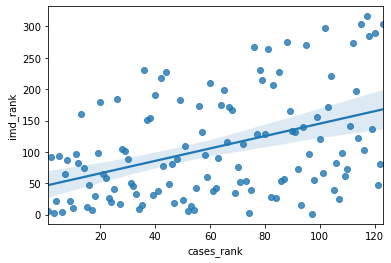

In [83]:
ax = sns.regplot(x="cases_rank", y="imd_rank", data=data_cleaned)

In [84]:
#0.42 suggests it is close to a strong positive correlation which backs up our initial prediction.
data_cleaned.imd_rank.corr(data_cleaned.cases_rank, method = 'spearman')

0.39909197611278074

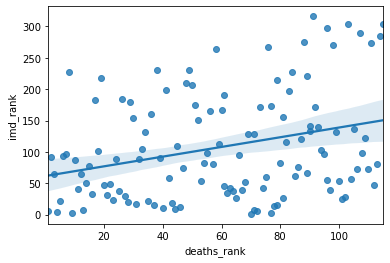

In [85]:
ax = sns.regplot(x="deaths_rank", y="imd_rank", data=data_cleaned)

In [86]:
#0.3 is a weak positive correlation.
data_cleaned.imd_rank.corr(data_cleaned.deaths_rank, method = 'spearman')

0.2788726944640588

{'whiskers': [<matplotlib.lines.Line2D at 0x25408870ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x2540887c610>,
 'boxes': [<matplotlib.lines.Line2D at 0x25408870b80>],
 'medians': [<matplotlib.lines.Line2D at 0x2540887ccd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2540887cfd0>],
 'means': []}

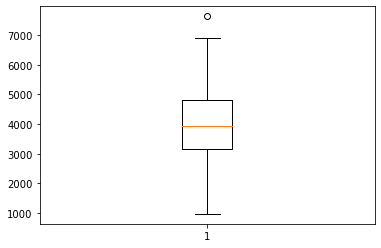

In [87]:
plt.boxplot(data_cleaned.cases_per_pop)

{'whiskers': [<matplotlib.lines.Line2D at 0x2540a3c99a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2540a3d40a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2540a3c9640>],
 'medians': [<matplotlib.lines.Line2D at 0x2540a3d4760>],
 'fliers': [<matplotlib.lines.Line2D at 0x2540a3d4a60>],
 'means': []}

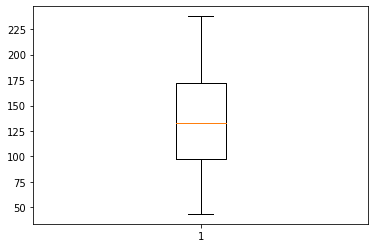

In [88]:
plt.boxplot(data_cleaned.deaths_per_pop)

{'whiskers': [<matplotlib.lines.Line2D at 0x2540a420910>,
 'caps': [<matplotlib.lines.Line2D at 0x2540a420fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2540a4205b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2540a42c6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2540a42c9d0>],
 'means': []}

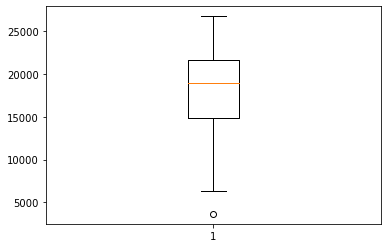

In [89]:
plt.boxplot(data_cleaned.imd_average)

To-Do List:

-Mapping (Geographic Visualisation)

-Time series to compare seasonal changes between most deprived and least deprived

-Grouped bar charts for each decile of deprivation showing cases per pop, and deaths per pop like this: https://www.health.org.uk/news-and-comment/charts-and-infographics/deprivation-and-excess-deaths



In [90]:
#Ranking the chart by imd_rank and then creaating a new column that assigns each row a decile rank.
data_imd_ranked = data_cleaned.sort_values(by = 'imd_rank') 
data_imd_ranked['Decile_rank'] = pd.qcut(data_imd_ranked['imd_rank'], 10, labels = False)
data_imd_ranked

,la_code,la_name,imd_average,imd_rank,pop_2020,covid_deaths,covid_cases,cases_per_pop,deaths_per_pop,cases_rank,deaths_rank,Decile_rank
8,E06000009,Blackpool,26765.29,1,138381,278,6075,4390.053548,200.894631,97.0,70.0,0
57,E08000003,Manchester,26417.75,2,555741,685,35129,6321.110013,123.258856,3.0,9.0,0
65,E08000011,Knowsley,26199.75,3,152452,252,8748,5738.199564,165.297930,74.0,77.0,0
66,E08000012,Liverpool,25833.57,4,500474,969,26666,5328.148915,193.616452,6.0,4.0,0
91,E09000002,Barking and Dagenham,25551.85,5,214107,272,11481,5362.272135,127.039284,52.0,72.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
34,E06000037,West Berkshire,7974.34,289,158465,155,3176,2004.228063,97.813397,120.0,107.0,9
116,E09000027,Richmond upon Thames,7159.19,297,198141,185,5951,3003.416759,93.367854,102.0,96.0,9
16,E06000017,Rutland,6306.80,303,40476,34,746,1843.067497,84.000395,123.0,115.0,9
37,E06000040,Windsor and Maidenhead,6289.30,304,151273,167,4417,2919.886563,110.396436,115.0,103.0,9


In [91]:
#Grouping deaths and cases by their decile of deprivation
grouped_imd_rank = data_imd_ranked.groupby(["Decile_rank"])["cases_per_pop", "deaths_per_pop"].sum().reset_index()
grouped_imd_rank.head()


<ipython-input-91-0c1614acad62>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_imd_rank = data_imd_ranked.groupby(["Decile_rank"])["cases_per_pop", "deaths_per_pop"].sum().reset_index()


,Decile_rank,cases_per_pop,deaths_per_pop
0,0,68740.780614,2002.439351
1,1,64130.893159,2037.052715
2,2,51591.300916,1829.901658
3,3,45030.732335,1592.944820
4,4,46733.484578,1497.133649


Text(0.5, 1.0, 'Cases against Decile')

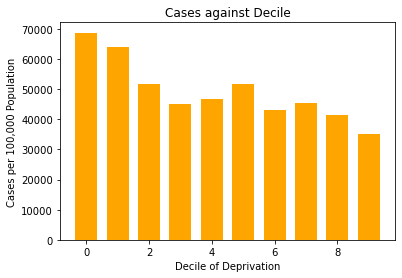

In [92]:
#Creating plot of cases against decile of deprivation
plt.bar(grouped_imd_rank['Decile_rank'], grouped_imd_rank['cases_per_pop'], width = 0.7, color = 'orange')
plt.xlabel("Decile of Deprivation")
plt.ylabel("Cases per 100,000 Population")
plt.title("Cases against Decile")


Text(0.5, 1.0, 'Deaths against Decile')

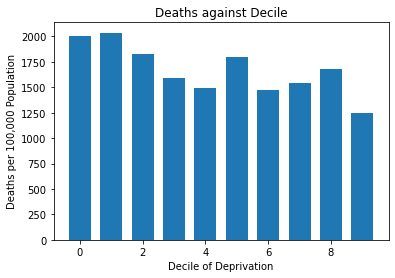

In [93]:
#Creating plot of cases against decile of deprivation
plt.bar(grouped_imd_rank['Decile_rank'], grouped_imd_rank['deaths_per_pop'], width = 0.7)
plt.xlabel("Decile of Deprivation")
plt.ylabel("Deaths per 100,000 Population")
plt.title("Deaths against Decile")


There is a clear downwards trend when looking at cases, however deaths fluctuate much more but do still show less deaths
in the lesser deprived areas.